<a href="https://colab.research.google.com/github/jburchfield76/datasharing/blob/master/Time_Series_Stationarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

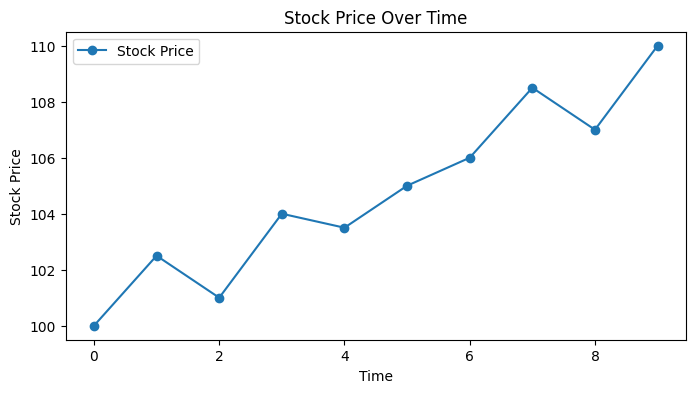

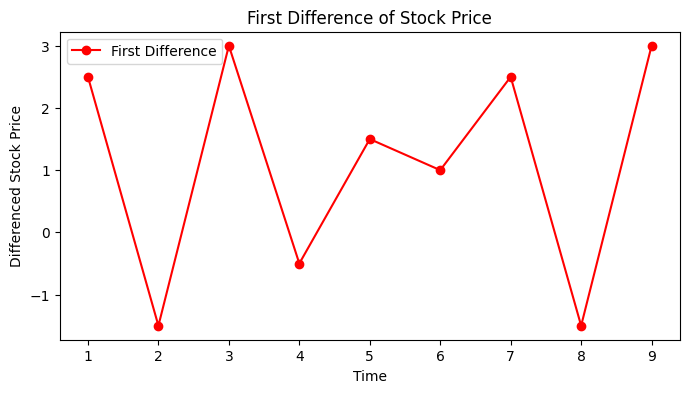

ADF Statistic: 1.5350996722110413
p-value: 0.9976491966481037
Critical Values: {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}
Fail to reject the null hypothesis - the series is non-stationary.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Create data
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'],
    'Stock_Price': [100.0, 102.5, 101.0, 104.0, 103.5, 105.0, 106.0, 108.5, 107.0, 110.0]
}

df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'], format='%b')

# Plot the raw stock price data
plt.figure(figsize=(8,4))
plt.plot(df['Stock_Price'], marker='o', linestyle='-', label="Stock Price")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price Over Time")
plt.legend()
plt.show()

# Compute first difference
df['First_Difference'] = df['Stock_Price'].diff()

# Plot first-differenced data
plt.figure(figsize=(8,4))
plt.plot(df['First_Difference'], marker='o', linestyle='-', color='r', label="First Difference")
plt.xlabel("Time")
plt.ylabel("Differenced Stock Price")
plt.title("First Difference of Stock Price")
plt.legend()
plt.show()

# Perform Augmented Dickey-Fuller (ADF) Test
adf_result = adfuller(df['Stock_Price'].dropna())

# Print ADF test results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

# Interpretation
if adf_result[1] < 0.05:
    print("Reject the null hypothesis - the series is stationary.")
else:
    print("Fail to reject the null hypothesis - the series is non-stationary.")
